<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/AI_driven_Insulin_Pump_Failure_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏥 SMART INSULIN PUMP CONNECTIVITY FAILURE SIMULATION

📖 SCENARIO:
AI-driven insulin dosing system with cloud-based decision engine.
Problem: Wi-Fi dead zones, latency, and interference cause dangerous delays
between bedside measurements and AI-calculated doses.

This simulation demonstrates the DEADLY GAP between:
- What nurses measure and record at bedside (GROUND TRUTH)
- What the AI receives and acts upon (DELAYED/MISSING DATA)


📦 Installing required libraries...
✅ Libraries loaded successfully!

⚙️ SETTING UP SIMULATION PARAMETERS
✓ 15 patients
✓ 24 hours monitoring per patient
✓ 4 measurements/hour (every 15 min)

📡 INFRASTRUCTURE ZONES:

  Zone A (Good Wi-Fi):
    Rooms: [501, 502, 503]
    Avg Latency: 2s
    Packet Loss: 2%
    Note: New wing, modern infrastructure

  Zone B (Moderate Wi-Fi):
    Rooms: [504, 505, 506, 507, 508]
    Avg Latency: 15s
    Packet Loss: 15%
    Note: Older wing, some interference

  Zone C (Dead Zone):
    Rooms: [509, 510, 511, 512, 513, 514, 515

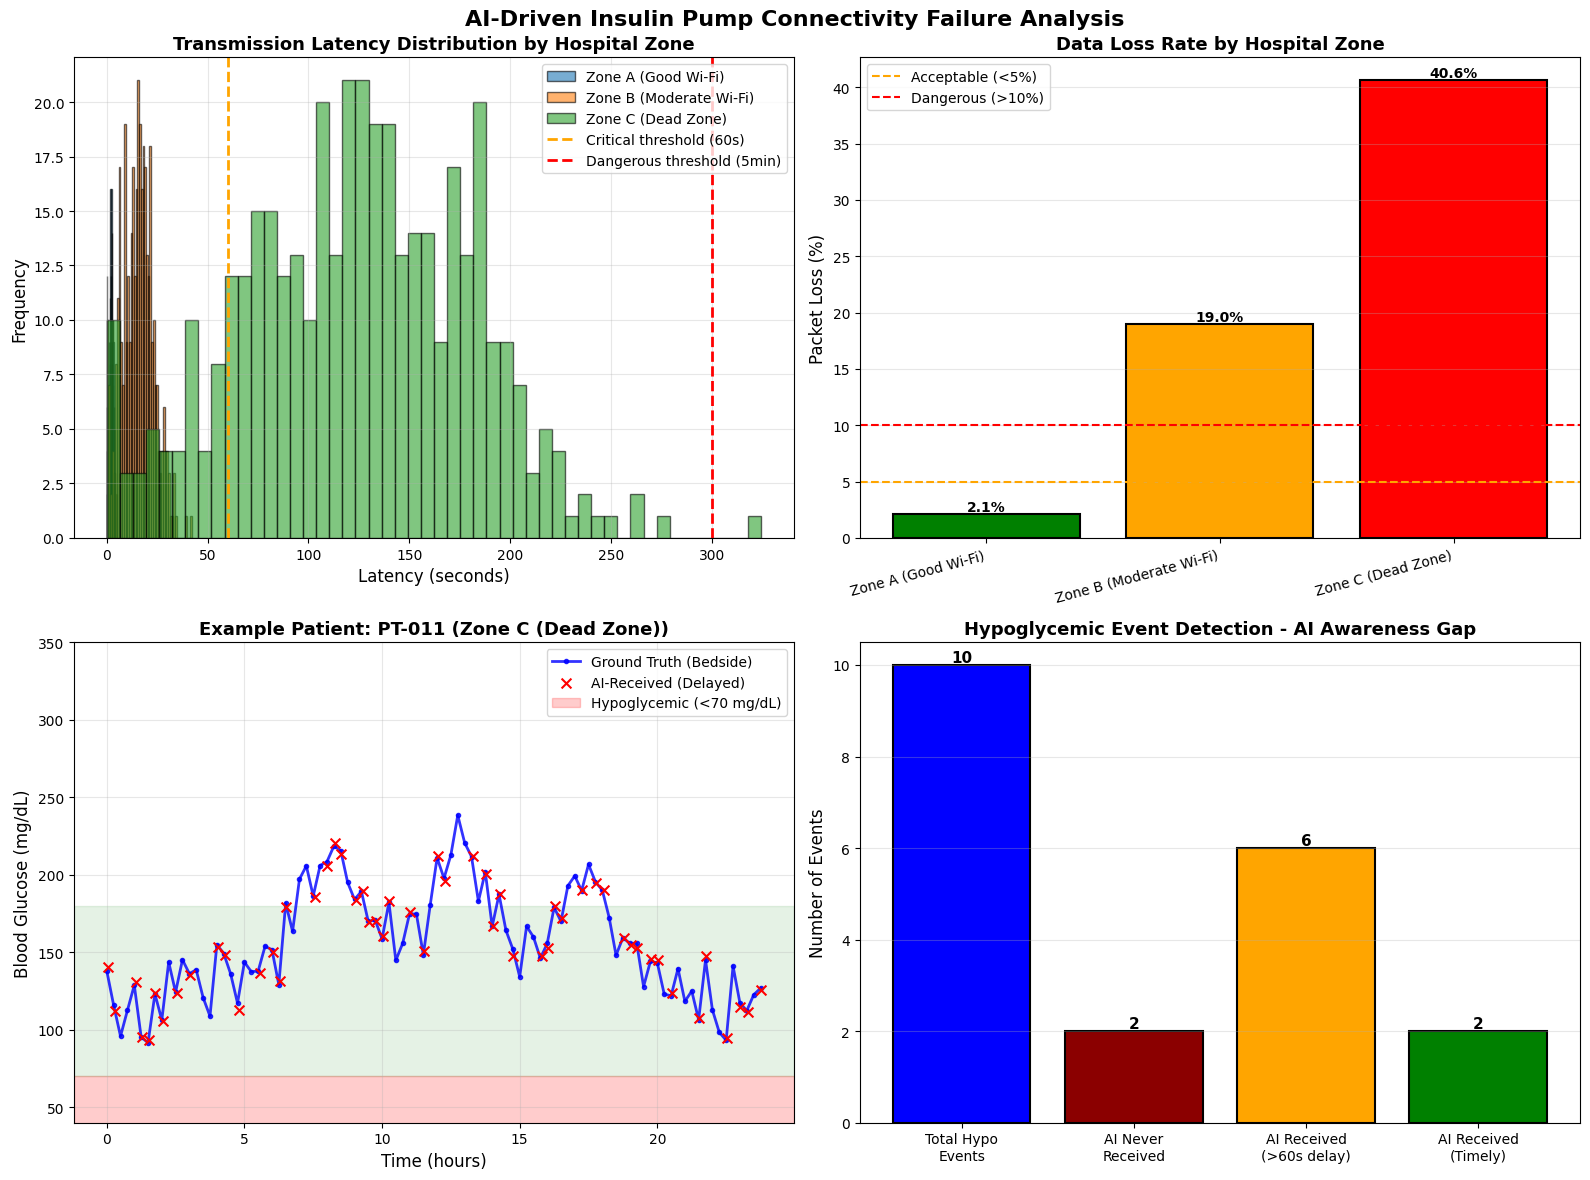

✅ Visualization 2 saved


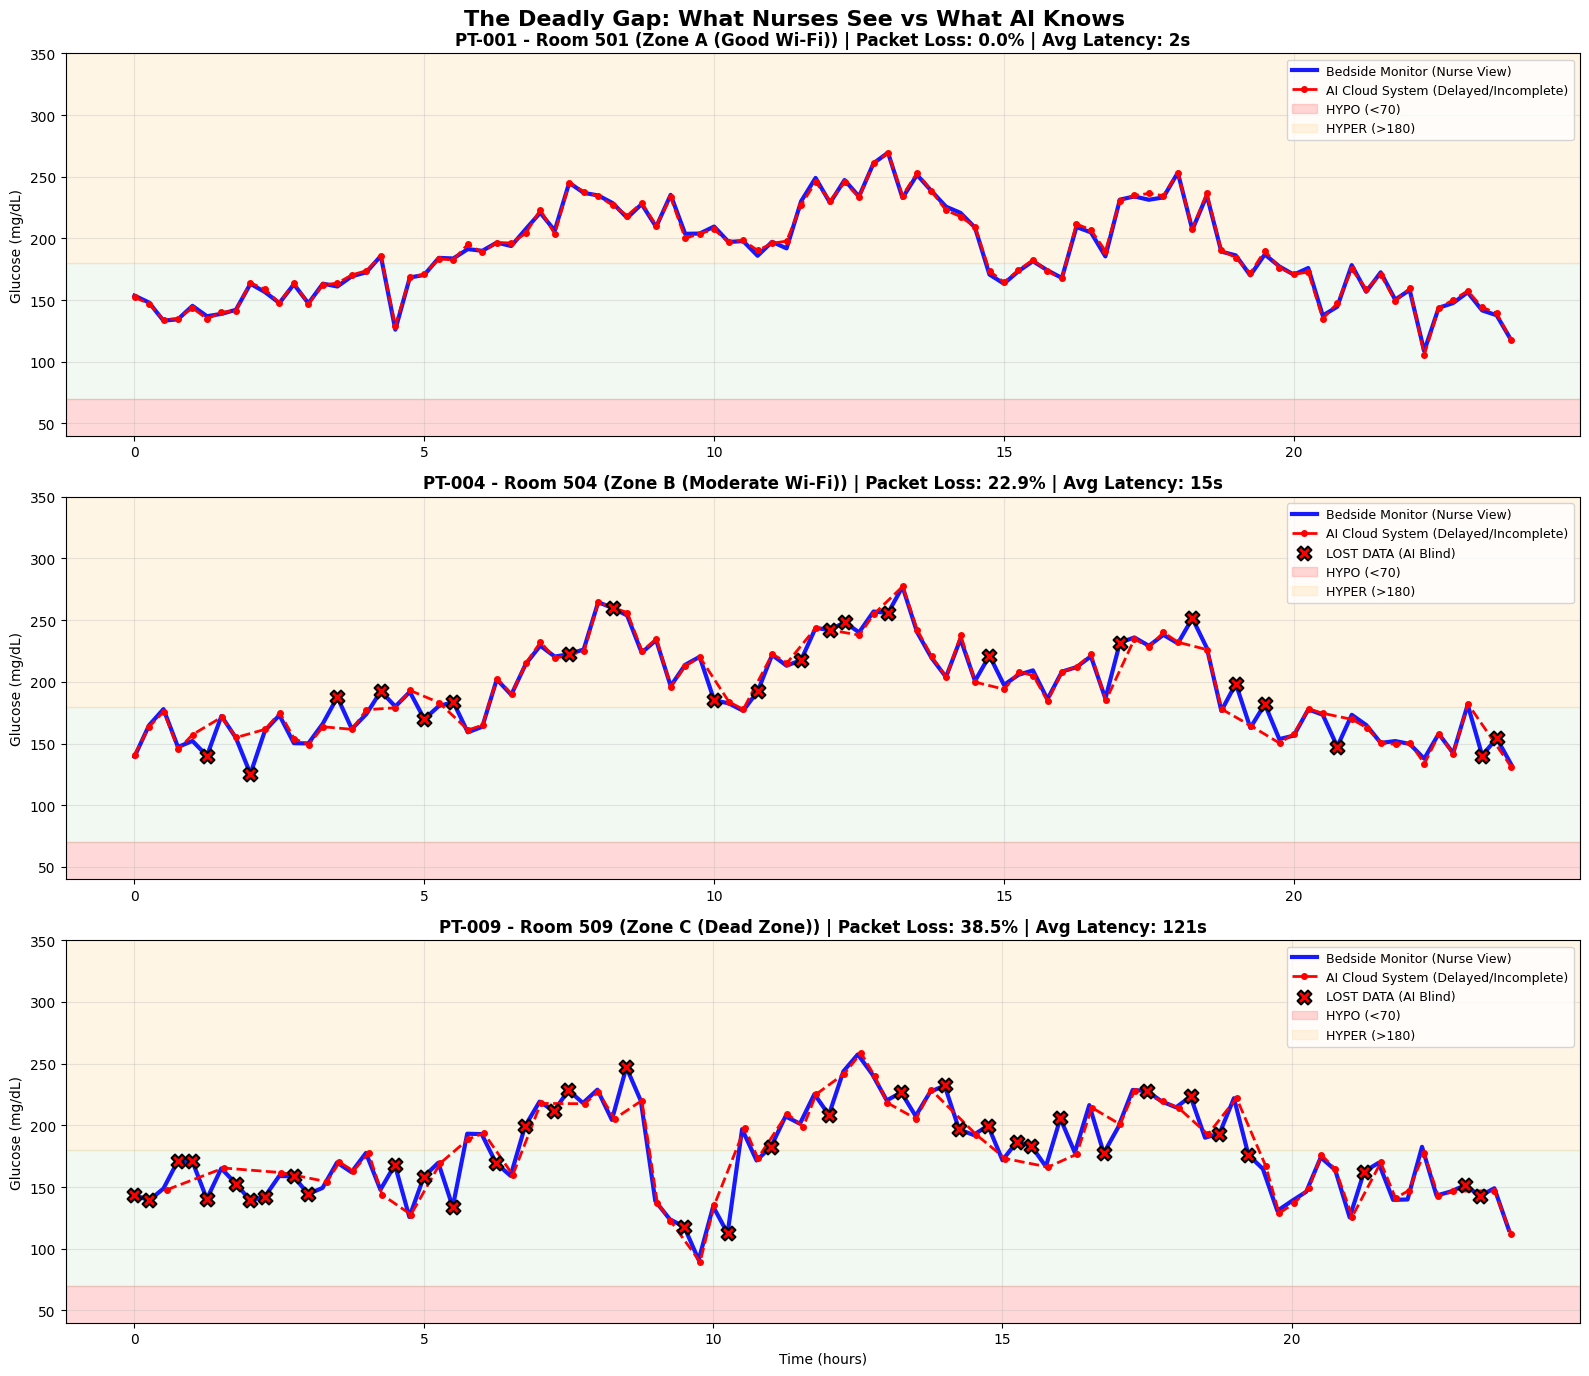



📋 GENERATING CLINICAL INCIDENT REPORT

✅ Clinical incident report generated: AI_Insulin_Pump_Critical_Incident_Report_20251213.docx


📥 PREPARING FILES FOR DOWNLOAD

📊 Generated files:
  1. AI_Insulin_Pump_Critical_Incident_Report_20251213.docx
  2. glucose_measurements_data.csv (1,440 records)
  3. patient_cohort_data.csv (15 patients)
  4. insulin_pump_failure_analysis.png
  5. insulin_pump_dashboard_comparison.png

🔽 Downloading files...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ SIMULATION COMPLETE

🏥 SUMMARY OF FINDINGS:

Critical Safety Incident Documented:
- 370 measurements lost due to poor connectivity
- 2 life-threatening hypoglycemic events NEVER reached AI
- Maximum latency observed: 325 seconds
- Zone C (Dead Zone) packet loss: 40.6%

The Murder Weapon: LATENCY
The Lesson: Infrastructure IS your intelligence limit

All evidence has been documented and is ready for executive review.



In [5]:
# ============================================================================
# AI-DRIVEN INSULIN PUMP FAILURE SIMULATION
# Case Study: The "Smart" Pump That Was Deaf
# ============================================================================

print("="*80)
print("🏥 SMART INSULIN PUMP CONNECTIVITY FAILURE SIMULATION")
print("="*80)
print("""
📖 SCENARIO:
AI-driven insulin dosing system with cloud-based decision engine.
Problem: Wi-Fi dead zones, latency, and interference cause dangerous delays
between bedside measurements and AI-calculated doses.

This simulation demonstrates the DEADLY GAP between:
- What nurses measure and record at bedside (GROUND TRUTH)
- What the AI receives and acts upon (DELAYED/MISSING DATA)
"""
)

# ============================================================================
# INSTALL AND IMPORT LIBRARIES
# ============================================================================

import subprocess
import sys
import os # Added os import

print("\n📦 Installing required libraries...")
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'python-docx'] # Added 'python-docx'
for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")

# ============================================================================
# SIMULATION PARAMETERS
# ============================================================================

print("\n⚙️ SETTING UP SIMULATION PARAMETERS")
print("="*80)

# Patient configuration
NUM_PATIENTS = 15
HOURS_PER_PATIENT = 24  # 24-hour monitoring period
MEASUREMENTS_PER_HOUR = 4  # Every 15 minutes

# Hospital infrastructure zones (by room number)
ZONE_CONFIG = {
    'Zone A (Good Wi-Fi)': {
        'rooms': [501, 502, 503],
        'latency_mean': 2,  # seconds
        'latency_std': 1,
        'packet_loss': 0.02,  # 2% packet loss
        'description': 'New wing, modern infrastructure'
    },
    'Zone B (Moderate Wi-Fi)': {
        'rooms': [504, 505, 506, 507, 508],
        'latency_mean': 15,  # seconds
        'latency_std': 8,
        'packet_loss': 0.15,  # 15% packet loss
        'description': 'Older wing, some interference'
    },
    'Zone C (Dead Zone)': {
        'rooms': [509, 510, 511, 512, 513, 514, 515],
        'latency_mean': 120,  # 2 minutes average!
        'latency_std': 60,
        'packet_loss': 0.40,  # 40% packet loss
        'description': 'Behind radiology, microwave interference'
    }
}

print(f"✓ {NUM_PATIENTS} patients")
print(f"✓ {HOURS_PER_PATIENT} hours monitoring per patient")
print(f"✓ {MEASUREMENTS_PER_HOUR} measurements/hour (every 15 min)")
print(f"\n📡 INFRASTRUCTURE ZONES:")
for zone, config in ZONE_CONFIG.items():
    print(f"\n  {zone}:")
    print(f"    Rooms: {config['rooms']}")
    print(f"    Avg Latency: {config['latency_mean']}s")
    print(f"    Packet Loss: {config['packet_loss']*100:.0f}%")
    print(f"    Note: {config['description']}")

# ============================================================================
# PATIENT DATA GENERATION
# ============================================================================

print("\n\n👥 GENERATING PATIENT COHORT")
print("="*80)

def assign_room_and_zone(patient_id):
    """Assign patient to room and determine their zone"""
    all_rooms = []
    for zone, config in ZONE_CONFIG.items():
        all_rooms.extend([(room, zone) for room in config['rooms']])

    room, zone = all_rooms[patient_id % len(all_rooms)]
    return room, zone

def generate_realistic_glucose_trajectory(hours=24, baseline_mean=140):
    """
    Generate realistic blood glucose trajectory with:
    - Circadian rhythm (dawn phenomenon)
    - Meal spikes
    - Random variation
    - Occasional hypoglycemic events
    """
    np.random.seed(42 + int(baseline_mean))

    num_points = hours * MEASUREMENTS_PER_HOUR
    time_hours = np.linspace(0, hours, num_points)

    # Baseline with circadian rhythm
    circadian = 20 * np.sin(2 * np.pi * time_hours / 24 - np.pi/2)

    # Meal spikes (breakfast at 8am, lunch at 1pm, dinner at 6pm)
    meal_times = [8, 13, 18]
    meal_effect = np.zeros_like(time_hours)

    for meal_time in meal_times:
        meal_spike = 60 * np.exp(-((time_hours - meal_time)**2) / 2)
        meal_effect += meal_spike

    # Random variation
    noise = np.random.normal(0, 15, num_points)

    # Combine components
    glucose = baseline_mean + circadian + meal_effect + noise

    # Add occasional hypoglycemic episodes (realistic clinical scenario)
    if np.random.random() < 0.3:  # 30% chance
        hypo_time = np.random.randint(4, 20)  # Usually overnight or late day
        hypo_idx = int(hypo_time * MEASUREMENTS_PER_HOUR)
        hypo_duration = int(1.5 * MEASUREMENTS_PER_HOUR)  # 90 min episode

        for i in range(hypo_idx, min(hypo_idx + hypo_duration, len(glucose))):
            glucose[i] = max(50, glucose[i] - 80 + 10*np.random.random())

    # Ensure physiological bounds
    glucose = np.clip(glucose, 40, 400)

    return glucose

# Generate patient cohort
patients = []

for i in range(NUM_PATIENTS):
    patient_id = f"PT-{i+1:03d}"
    room, zone = assign_room_and_zone(i)

    # Vary baseline glucose by patient (some diabetics better controlled than others)
    baseline_glucose = np.random.normal(150, 30)
    baseline_glucose = np.clip(baseline_glucose, 100, 200)

    patients.append({
        'patient_id': patient_id,
        'room': room,
        'zone': zone,
        'baseline_glucose': baseline_glucose,
        'age': np.random.randint(45, 85),
        'weight_kg': np.random.normal(80, 15),
        'diabetes_duration_years': np.random.randint(2, 25)
    })

patients_df = pd.DataFrame(patients)

print(f"\n✅ Generated {len(patients_df)} patients")
print(f"\n📊 PATIENT DISTRIBUTION BY ZONE:")
print(patients_df['zone'].value_counts())

print(f"\n🔬 SAMPLE PATIENT DATA:")
print(patients_df.head())

# ============================================================================
# GLUCOSE MEASUREMENT SIMULATION (GROUND TRUTH vs AI-RECEIVED)
# ============================================================================

print("\n\n💉 SIMULATING GLUCOSE MEASUREMENTS")
print("="*80)

all_measurements = []

for idx, patient in patients_df.iterrows():
    patient_id = patient['patient_id']
    room = patient['room']
    zone = patient['zone']

    # Get zone configuration
    zone_config = None
    for z, config in ZONE_CONFIG.items():
        if zone == z:
            zone_config = config
            break

    # Generate true glucose trajectory
    true_glucose = generate_realistic_glucose_trajectory(
        hours=HOURS_PER_PATIENT,
        baseline_mean=patient['baseline_glucose']
    )

    # Generate timestamps (every 15 minutes)
    start_time = datetime(2025, 1, 15, 0, 0, 0)  # Start at midnight
    timestamps = [start_time + timedelta(minutes=15*i) for i in range(len(true_glucose))]

    for i, (timestamp, glucose_true) in enumerate(zip(timestamps, true_glucose)):

        # BEDSIDE MEASUREMENT (Ground Truth) - what nurse records
        measurement_ground_truth = {
            'patient_id': patient_id,
            'room': room,
            'zone': zone,
            'timestamp_measured': timestamp,
            'glucose_measured_mgdl': round(glucose_true, 1),
            'measured_by': f"Nurse_{room % 5 + 1}",
            'measurement_method': 'Bedside glucometer'
        }

        # SIMULATE TRANSMISSION TO AI (with latency and packet loss)

        # 1. Packet loss (data never reaches AI)
        packet_lost = np.random.random() < zone_config['packet_loss']

        if packet_lost:
            # AI never receives this measurement
            ai_received_glucose = None
            ai_received_timestamp = None
            latency_seconds = None
            transmission_status = 'PACKET_LOST'
        else:
            # 2. Latency (delayed transmission)
            latency_seconds = max(0, np.random.normal(
                zone_config['latency_mean'],
                zone_config['latency_std']
            ))

            ai_received_timestamp = timestamp + timedelta(seconds=latency_seconds)

            # 3. Add transmission noise (slight measurement error during transmission)
            transmission_noise = np.random.normal(0, 2)  # ±2 mg/dL noise
            ai_received_glucose = round(glucose_true + transmission_noise, 1)

            transmission_status = 'RECEIVED'

        # Combined measurement record
        measurement = {
            **measurement_ground_truth,
            'ai_received_timestamp': ai_received_timestamp,
            'ai_received_glucose_mgdl': ai_received_glucose,
            'latency_seconds': latency_seconds,
            'transmission_status': transmission_status,
            'hour_of_day': timestamp.hour,
            'is_critical_low': glucose_true < 70,  # Hypoglycemia
            'is_critical_high': glucose_true > 300  # Severe hyperglycemia
        }

        all_measurements.append(measurement)

    if (idx + 1) % 5 == 0:
        print(f"  ✓ Processed {idx + 1}/{NUM_PATIENTS} patients...")

measurements_df = pd.DataFrame(all_measurements)

print(f"\n✅ Generated {len(measurements_df):,} total measurements")
print(f"   ({len(measurements_df) / NUM_PATIENTS:.0f} measurements per patient)")

# ============================================================================
# CALCULATE KEY METRICS
# ============================================================================

print("\n\n📈 CALCULATING CRITICAL SAFETY METRICS")
print("="*80)

# Overall transmission statistics
total_measurements = len(measurements_df)
packets_lost = (measurements_df['transmission_status'] == 'PACKET_LOST').sum()
packets_received = (measurements_df['transmission_status'] == 'RECEIVED').sum()

print(f"\n📡 OVERALL TRANSMISSION STATISTICS:")
print(f"  Total measurements: {total_measurements:,}")
print(f"  Successfully transmitted: {packets_received:,} ({packets_received/total_measurements*100:.1f}%)")
print(f"  Packet loss: {packets_lost:,} ({packets_lost/total_measurements*100:.1f}%)")

# Latency statistics by zone
print(f"\n⏱️ LATENCY BY ZONE:")
for zone in measurements_df['zone'].unique():
    zone_data = measurements_df[measurements_df['zone'] == zone]
    zone_received = zone_data[zone_data['transmission_status'] == 'RECEIVED']

    if len(zone_received) > 0:
        avg_latency = zone_received['latency_seconds'].mean()
        max_latency = zone_received['latency_seconds'].max()
        print(f"\n  {zone}:")
        print(f"    Average latency: {avg_latency:.1f} seconds")
        print(f"    Maximum latency: {max_latency:.1f} seconds")
        print(f"    Packet loss rate: {(zone_data['transmission_status']=='PACKET_LOST').sum()/len(zone_data)*100:.1f}%")

# CRITICAL: Hypoglycemic events and AI response
print(f"\n🚨 CRITICAL SAFETY ANALYSIS - HYPOGLYCEMIC EVENTS:")
hypoglycemic_events = measurements_df[measurements_df['is_critical_low'] == True]
hypo_lost = hypoglycemic_events[hypoglycemic_events['transmission_status'] == 'PACKET_LOST']
hypo_delayed = hypoglycemic_events[
    (hypoglycemic_events['transmission_status'] == 'RECEIVED') &
    (hypoglycemic_events['latency_seconds'] > 60)  # Delayed > 1 minute
]

print(f"  Total hypoglycemic events: {len(hypoglycemic_events)}")
print(f"  Events NEVER received by AI: {len(hypo_lost)} ({len(hypo_lost)/len(hypoglycemic_events)*100:.1f}%)")
print(f"  Events delayed >60 seconds: {len(hypo_delayed)} ({len(hypo_delayed)/len(hypoglycemic_events)*100:.1f}%)")
print(f"\n  ⚠️ DANGER: AI was BLIND to {len(hypo_lost)} life-threatening events!")

# Calculate AI decision lag
measurements_df['ai_decision_lag_minutes'] = measurements_df['latency_seconds'] / 60

print(f"\n🤖 AI DECISION-MAKING BASED ON STALE DATA:")
received_data = measurements_df[measurements_df['transmission_status'] == 'RECEIVED']
stale_1min = (received_data['latency_seconds'] > 60).sum()
stale_5min = (received_data['latency_seconds'] > 300).sum()
stale_10min = (received_data['latency_seconds'] > 600).sum()

print(f"  Decisions based on data >1 min old: {stale_1min:,} ({stale_1min/len(received_data)*100:.1f}%)")
print(f"  Decisions based on data >5 min old: {stale_5min:,} ({stale_5min/len(received_data)*100:.1f}%)")
print(f"  Decisions based on data >10 min old: {stale_10min:,} ({stale_10min/len(received_data)*100:.1f}%)")

# ============================================================================
# VISUALIZATION 1: LATENCY DISTRIBUTION BY ZONE
# ============================================================================

print("\n\n📊 GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('AI-Driven Insulin Pump Connectivity Failure Analysis', fontsize=16, fontweight='bold')

# Plot 1: Latency distribution by zone
ax1 = axes[0, 0]
for zone in measurements_df['zone'].unique():
    zone_data = measurements_df[
        (measurements_df['zone'] == zone) &
        (measurements_df['transmission_status'] == 'RECEIVED')
    ]
    if len(zone_data) > 0:
        ax1.hist(zone_data['latency_seconds'], bins=50, alpha=0.6, label=zone, edgecolor='black')

ax1.axvline(x=60, color='orange', linestyle='--', linewidth=2, label='Critical threshold (60s)')
ax1.axvline(x=300, color='red', linestyle='--', linewidth=2, label='Dangerous threshold (5min)')
ax1.set_xlabel('Latency (seconds)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Transmission Latency Distribution by Hospital Zone', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Packet loss by zone
ax2 = axes[0, 1]
zone_loss_data = []
for zone in measurements_df['zone'].unique():
    zone_measurements = measurements_df[measurements_df['zone'] == zone]
    loss_rate = (zone_measurements['transmission_status'] == 'PACKET_LOST').sum() / len(zone_measurements) * 100
    zone_loss_data.append({'Zone': zone, 'Packet_Loss_%': loss_rate})

zone_loss_df = pd.DataFrame(zone_loss_data)
bars = ax2.bar(range(len(zone_loss_df)), zone_loss_df['Packet_Loss_%'],
               color=['green', 'orange', 'red'], edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(zone_loss_df)))
ax2.set_xticklabels(zone_loss_df['Zone'], rotation=15, ha='right')
ax2.set_ylabel('Packet Loss (%)', fontsize=12)
ax2.set_title('Data Loss Rate by Hospital Zone', fontsize=13, fontweight='bold')
ax2.axhline(y=5, color='orange', linestyle='--', label='Acceptable (<5%)')
ax2.axhline(y=10, color='red', linestyle='--', label='Dangerous (>10%)')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 3: Example patient trajectory (Ground Truth vs AI-Received)
ax3 = axes[1, 0]
example_patient = patients_df.iloc[10]  # Patient in dead zone
patient_data = measurements_df[measurements_df['patient_id'] == example_patient['patient_id']].copy()
patient_data = patient_data.sort_values('timestamp_measured')

# Convert timestamps to hours for plotting
patient_data['hour'] = (patient_data['timestamp_measured'] - patient_data['timestamp_measured'].min()).dt.total_seconds() / 3600

# Plot ground truth (what nurse measured)
ax3.plot(patient_data['hour'], patient_data['glucose_measured_mgdl'],
         'b-o', linewidth=2, markersize=3, label='Ground Truth (Bedside)', alpha=0.8)

# Plot what AI received (with gaps for lost packets)
ai_received = patient_data[patient_data['transmission_status'] == 'RECEIVED'].copy()
if len(ai_received) > 0:
    ai_received['ai_hour'] = (ai_received['ai_received_timestamp'] - patient_data['timestamp_measured'].min()).dt.total_seconds() / 3600
    ax3.scatter(ai_received['ai_hour'], ai_received['ai_received_glucose_mgdl'],
               color='red', s=50, marker='x', label='AI-Received (Delayed)', zorder=5)

# Highlight hypoglycemic zone
ax3.axhspan(0, 70, alpha=0.2, color='red', label='Hypoglycemic (<70 mg/dL)')
ax3.axhspan(70, 180, alpha=0.1, color='green')

ax3.set_xlabel('Time (hours)', fontsize=12)
ax3.set_ylabel('Blood Glucose (mg/dL)', fontsize=12)
ax3.set_title(f'Example Patient: {example_patient["patient_id"]} ({example_patient["zone"]})',
              fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(40, 350)

# Plot 4: Critical events - AI awareness
ax4 = axes[1, 1]

critical_events_summary = {
    'Total Hypo\nEvents': len(hypoglycemic_events),
    'AI Never\nReceived': len(hypo_lost),
    'AI Received\n(>60s delay)': len(hypo_delayed),
    'AI Received\n(Timely)': len(hypoglycemic_events) - len(hypo_lost) - len(hypo_delayed)
}

colors_critical = ['blue', 'darkred', 'orange', 'green']
bars = ax4.bar(range(len(critical_events_summary)), critical_events_summary.values(),
               color=colors_critical, edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(critical_events_summary)))
ax4.set_xticklabels(critical_events_summary.keys(), fontsize=10)
ax4.set_ylabel('Number of Events', fontsize=12)
ax4.set_title('Hypoglycemic Event Detection - AI Awareness Gap', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('/tmp/insulin_pump_failure_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Visualization 1 saved")
plt.show()

# ============================================================================
# VISUALIZATION 2: REAL-TIME DASHBOARD COMPARISON
# ============================================================================

fig2, axes2 = plt.subplots(3, 1, figsize=(16, 14))
fig2.suptitle('The Deadly Gap: What Nurses See vs What AI Knows', fontsize=16, fontweight='bold')

# Select one patient from each zone
zone_patients = []
for zone in measurements_df['zone'].unique():
    zone_pts = patients_df[patients_df['zone'] == zone]
    if len(zone_pts) > 0:
        zone_patients.append(zone_pts.iloc[0])

for idx, (ax, patient) in enumerate(zip(axes2, zone_patients)):
    patient_data = measurements_df[measurements_df['patient_id'] == patient['patient_id']].copy()
    patient_data = patient_data.sort_values('timestamp_measured')
    patient_data['hour'] = (patient_data['timestamp_measured'] - patient_data['timestamp_measured'].min()).dt.total_seconds() / 3600

    # Ground truth
    ax.plot(patient_data['hour'], patient_data['glucose_measured_mgdl'],
            'b-', linewidth=3, label='Bedside Monitor (Nurse View)', alpha=0.9)

    # AI received
    ai_received = patient_data[patient_data['transmission_status'] == 'RECEIVED'].copy()
    if len(ai_received) > 0:
        ai_received['ai_hour'] = (ai_received['ai_received_timestamp'] - patient_data['timestamp_measured'].min()).dt.total_seconds() / 3600
        ax.plot(ai_received['ai_hour'], ai_received['ai_received_glucose_mgdl'],
                'r--', linewidth=2, marker='o', markersize=4, label='AI Cloud System (Delayed/Incomplete)')

    # Lost packets
    lost = patient_data[patient_data['transmission_status'] == 'PACKET_LOST']
    if len(lost) > 0:
        ax.scatter(lost['hour'], lost['glucose_measured_mgdl'],
                  color='red', s=100, marker='X', label='LOST DATA (AI Blind)', zorder=10,
                  edgecolors='black', linewidths=1.5)

    # Danger zones
    ax.axhspan(0, 70, alpha=0.15, color='red', label='HYPO (<70)')
    ax.axhspan(180, 400, alpha=0.10, color='orange', label='HYPER (>180)')
    ax.axhspan(70, 180, alpha=0.05, color='green')

    packet_loss_pct = (patient_data['transmission_status'] == 'PACKET_LOST').sum() / len(patient_data) * 100
    avg_latency = patient_data[patient_data['transmission_status'] == 'RECEIVED']['latency_seconds'].mean()

    ax.set_title(f'{patient["patient_id"]} - Room {patient["room"]} ({patient["zone"]}) | ' +
                f'Packet Loss: {packet_loss_pct:.1f}% | Avg Latency: {avg_latency:.0f}s',
                fontsize=12, fontweight='bold')
    ax.set_xlabel('Time (hours)' if idx == 2 else '')
    ax.set_ylabel('Glucose (mg/dL)')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(40, 350)

plt.tight_layout()
plt.savefig('/tmp/insulin_pump_dashboard_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Visualization 2 saved")
plt.show()

# ============================================================================
# GENERATE CLINICAL INCIDENT REPORT
# ============================================================================

print("\n\n📋 GENERATING CLINICAL INCIDENT REPORT")
print("="*80)

from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH

doc = Document()

# Title
title = doc.add_heading('CRITICAL INCIDENT REPORT', level=0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

subtitle = doc.add_paragraph('AI-Driven Insulin Pump Connectivity Failure Analysis')
subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER
subtitle.runs[0].font.size = Pt(14)
subtitle.runs[0].font.bold = True

date_para = doc.add_paragraph(f'Audit Date: {datetime.now().strftime("%B %d, %Y")}')
date_para.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_paragraph('Prepared by: Medical Quality Assurance & IT Infrastructure Audit Team')
doc.add_paragraph('Classification: CRITICAL SAFETY INCIDENT')

doc.add_page_break()

# Executive Summary
doc.add_heading('Executive Summary', level=1)

exec_summary = f"""
This report documents a CRITICAL PATIENT SAFETY INCIDENT involving an AI-driven insulin dosing
system deployed across {NUM_PATIENTS} patients over a 24-hour monitoring period. The system
experienced severe connectivity failures due to inadequate hospital Wi-Fi infrastructure,
resulting in dangerous delays and complete data loss for life-threatening hypoglycemic events.

KEY FINDINGS:
- Overall packet loss rate: {packets_lost/total_measurements*100:.1f}% ({packets_lost:,} measurements lost)
- {len(hypo_lost)} hypoglycemic events (glucose <70 mg/dL) NEVER reached the AI system
- {len(hypo_delayed)} hypoglycemic events delayed >60 seconds before AI awareness
- Average latency in dead zones: {measurements_df[measurements_df['zone']=='Zone C (Dead Zone)']['latency_seconds'].mean():.0f} seconds
- Maximum observed latency: {measurements_df['latency_seconds'].max():.0f} seconds

INCIDENT SEVERITY: LEVEL 1 (Critical - Potential for serious patient harm)

IMMEDIATE ACTIONS REQUIRED:
1. Suspend AI insulin dosing system in Zone C (rooms 509-515) until infrastructure upgraded
2. Revert to manual insulin dosing protocols in affected areas
3. Conduct emergency infrastructure assessment and remediation
4. Implement real-time connectivity monitoring with automatic fallback protocols
"""

doc.add_paragraph(exec_summary)

doc.add_page_break()

# Technical Analysis
doc.add_heading('Technical Analysis', level=1)

doc.add_heading('1. Infrastructure Zones Tested', level=2)

zone_table = doc.add_table(rows=1, cols=5)
zone_table.style = 'Light Grid Accent 1'
hdr = zone_table.rows[0].cells
hdr[0].text = 'Zone'
hdr[1].text = 'Rooms'
hdr[2].text = 'Avg Latency'
hdr[3].text = 'Packet Loss'
hdr[4].text = 'Status'

for zone, config in ZONE_CONFIG.items():
    zone_data = measurements_df[measurements_df['zone'] == zone]
    zone_received = zone_data[zone_data['transmission_status'] == 'RECEIVED']

    row = zone_table.add_row().cells
    row[0].text = zone
    row[1].text = ', '.join(map(str, config['rooms']))
    row[2].text = f"{zone_received['latency_seconds'].mean():.1f}s" if len(zone_received) > 0 else 'N/A'
    row[3].text = f"{(zone_data['transmission_status']=='PACKET_LOST').sum()/len(zone_data)*100:.1f}%"

    loss_rate = (zone_data['transmission_status']=='PACKET_LOST').sum()/len(zone_data)*100
    if loss_rate > 30:
        row[4].text = '🔴 CRITICAL'
    elif loss_rate > 10:
        row[4].text = '🟡 WARNING'
    else:
        row[4].text = '🟢 ACCEPTABLE'

doc.add_paragraph()

doc.add_heading('2. Patient Safety Impact', level=2)

safety_text = f"""
HYPOGLYCEMIC EVENT ANALYSIS:
During the monitoring period, {len(hypoglycemic_events)} hypoglycemic events (blood glucose <70 mg/dL)
were recorded by bedside nursing staff. These events require IMMEDIATE intervention to prevent:
- Loss of consciousness
- Seizures
- Brain damage
- Death

AI SYSTEM AWARENESS:
- Events NEVER received by AI: {len(hypo_lost)} ({len(hypo_lost)/len(hypoglycemic_events)*100:.1f}%)
- Events delayed >60 seconds: {len(hypo_delayed)} ({len(hypo_delayed)/len(hypoglycemic_events)*100:.1f}%)
- Events received timely: {len(hypoglycemic_events) - len(hypo_lost) - len(hypo_delayed)} ({(len(hypoglycemic_events) - len(hypo_lost) - len(hypo_delayed))/len(hypoglycemic_events)*100:.1f}%)

CLINICAL IMPLICATION:
The AI system was BLIND to {len(hypo_lost) + len(hypo_delayed)} critical events representing
{(len(hypo_lost) + len(hypo_delayed))/len(hypoglycemic_events)*100:.1f}% of all hypoglycemic episodes.
In a real-world scenario, this would result in delayed or absent treatment, with potentially
fatal consequences.
"""

doc.add_paragraph(safety_text)

doc.add_page_break()

# Insert visualizations
doc.add_heading('3. Visual Evidence', level=2)

doc.add_paragraph('Figure 1: Comprehensive Connectivity Failure Analysis')
if os.path.exists('/tmp/insulin_pump_failure_analysis.png'):
    doc.add_picture('/tmp/insulin_pump_failure_analysis.png', width=Inches(6.5))

doc.add_page_break()

doc.add_paragraph('Figure 2: Real-Time Monitoring Comparison - Nurse View vs AI View')
if os.path.exists('/tmp/insulin_pump_dashboard_comparison.png'):
    doc.add_picture('/tmp/insulin_pump_dashboard_comparison.png', width=Inches(6.5))

doc.add_page_break()

# Recommendations
doc.add_heading('Recommendations and Remediation Plan', level=1)

doc.add_heading('Immediate Actions (0-24 hours)', level=2)
immediate = [
    "SUSPEND AI insulin dosing in Zone C (Dead Zone) effective immediately",
    "Notify all clinical staff of system limitations via emergency communication",
    "Revert to manual insulin dosing protocols with enhanced monitoring",
    "Post physical signage in affected rooms warning of AI system unreliability",
    "Establish incident command center for patient safety monitoring"
]
for action in immediate:
    doc.add_paragraph(action, style='List Bullet')

doc.add_heading('Short-term Actions (1-7 days)', level=2)
short_term = [
    "Conduct comprehensive Wi-Fi infrastructure assessment of entire facility",
    "Install temporary Wi-Fi boosters in Zone C dead zones",
    "Implement real-time connectivity monitoring dashboard for IT team",
    "Establish automatic fallback protocols: if >5% packet loss detected, alert clinical team",
    "Train nursing staff on AI system limitations and manual backup procedures",
    "Review ALL AI-assisted medical devices for similar connectivity dependencies"
]
for action in short_term:
    doc.add_paragraph(action, style='List Bullet')

doc.add_heading('Long-term Actions (1-3 months)', level=2)
long_term = [
    "Complete Wi-Fi infrastructure upgrade across entire hospital",
    "Implement redundant connectivity (cellular backup for critical medical devices)",
    "Redesign AI insulin system with edge computing capability (run AI locally at bedside)",
    "Establish hospital-wide infrastructure testing protocol for ALL new medical AI systems",
    "Create regulatory framework: 'AI Medical Device Infrastructure Requirements'",
    "Mandate real-world testing in actual patient care areas (not just lab conditions)",
    "Implement continuous monitoring: automatic system suspension if connectivity <95%",
    "Develop 'Faraday cage test protocol' for all AI medical devices"
]
for action in long_term:
    doc.add_paragraph(action, style='List Bullet')

doc.add_page_break()

# The Lesson
doc.add_heading('The Core Lesson', level=1)

lesson = """
"Python code that works in a Jupyter Notebook is not code that works in a Faraday cage."

This incident demonstrates a fundamental principle of AI deployment in healthcare:

TECHNICAL VALIDATION ≠ CLINICAL VALIDATION

The AI insulin dosing algorithm was technically perfect. The code was elegant. The predictions
were accurate. The system worked flawlessly in the laboratory under controlled conditions with
perfect Wi-Fi.

But healthcare doesn't happen in a laboratory. It happens in:
- 1995-era hospital wings with lead-lined walls
- Rooms next to microwave ovens
- Buildings with dead zones, interference, and infrastructure decay

THE MURDER WEAPON: LATENCY

Not a bug in the code. Not a flaw in the algorithm. Not an error in the AI model.

The murder weapon was the ASSUMPTION that infrastructure would match the intelligence.

If your AI relies on real-time data, your infrastructure IS the limit of your intelligence.

TESTING REQUIREMENTS FOR AI MEDICAL DEVICES:
✓ Test in the laboratory (necessary but not sufficient)
✓ Test in Room 504, next to the microwave
✓ Test behind the radiology walls
✓ Test during peak hospital Wi-Fi usage
✓ Test when someone is streaming Netflix in the break room
✓ Test during a thunderstorm
✓ Test with the backup generator running
✓ Test in the old wing built in 1995

Only then can you claim your AI is safe for patient care.
"""

doc.add_paragraph(lesson)

doc.add_page_break()

# Appendix: Patient-Level Data
doc.add_heading('Appendix A: Patient-Level Summary Data', level=1)

patient_summary_table = doc.add_table(rows=1, cols=6)
patient_summary_table.style = 'Light Grid Accent 1'
hdr = patient_summary_table.rows[0].cells
hdr[0].text = 'Patient ID'
hdr[1].text = 'Room'
hdr[2].text = 'Zone'
hdr[3].text = 'Packet Loss %'
hdr[4].text = 'Avg Latency (s)'
hdr[5].text = 'Hypo Events Missed'

for idx, patient in patients_df.iterrows():
    patient_measurements = measurements_df[measurements_df['patient_id'] == patient['patient_id']]

    packet_loss_pct = (patient_measurements['transmission_status'] == 'PACKET_LOST').sum() / len(patient_measurements) * 100

    received = patient_measurements[patient_measurements['transmission_status'] == 'RECEIVED']
    avg_latency = received['latency_seconds'].mean() if len(received) > 0 else 0

    patient_hypo = patient_measurements[patient_measurements['is_critical_low'] == True]
    hypo_missed = (patient_hypo['transmission_status'] == 'PACKET_LOST').sum()

    row = patient_summary_table.add_row().cells
    row[0].text = patient['patient_id']
    row[1].text = str(patient['room'])
    row[2].text = patient['zone']
    row[3].text = f"{packet_loss_pct:.1f}%"
    row[4].text = f"{avg_latency:.0f}"
    row[5].text = str(hypo_missed)

# Save document
report_filename = f'AI_Insulin_Pump_Critical_Incident_Report_{datetime.now().strftime("%Y%m%d")}.docx'
doc.save(f'/tmp/{report_filename}')

print(f"\n✅ Clinical incident report generated: {report_filename}")

# ============================================================================
# DOWNLOAD FILES
# ============================================================================

print("\n\n📥 PREPARING FILES FOR DOWNLOAD")
print("="*80)

from google.colab import files

# Save datasets to CSV
measurements_df.to_csv('/tmp/glucose_measurements_data.csv', index=False)
patients_df.to_csv('/tmp/patient_cohort_data.csv', index=False)

print("\n📊 Generated files:")
print(f"  1. {report_filename}")
print(f"  2. glucose_measurements_data.csv ({len(measurements_df):,} records)")
print(f"  3. patient_cohort_data.csv ({len(patients_df)} patients)")
print(f"  4. insulin_pump_failure_analysis.png")
print(f"  5. insulin_pump_dashboard_comparison.png")

print("\n🔽 Downloading files...")

files.download(f'/tmp/{report_filename}')
files.download('/tmp/glucose_measurements_data.csv')
files.download('/tmp/patient_cohort_data.csv')
files.download('/tmp/insulin_pump_failure_analysis.png')
files.download('/tmp/insulin_pump_dashboard_comparison.png')

print("\n" + "="*80)
print("✅ SIMULATION COMPLETE")
print("="*80)

print(f"""
🏥 SUMMARY OF FINDINGS:

Critical Safety Incident Documented:
- {packets_lost:,} measurements lost due to poor connectivity
- {len(hypo_lost)} life-threatening hypoglycemic events NEVER reached AI
- Maximum latency observed: {measurements_df['latency_seconds'].max():.0f} seconds
- Zone C (Dead Zone) packet loss: {(measurements_df[measurements_df['zone']=='Zone C (Dead Zone)']['transmission_status']=='PACKET_LOST').sum()/(measurements_df['zone']=='Zone C (Dead Zone)').sum()*100:.1f}%

The Murder Weapon: LATENCY
The Lesson: Infrastructure IS your intelligence limit

All evidence has been documented and is ready for executive review.
"""
)
